# 퓨처스리그 항공

In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as  plt

In [2]:
AFSNT = pd.read_csv("AFSNT.csv", engine='python')          # train table

AFSNT_DLY = pd.read_csv("AFSNT_DLY.csv", engine='python')   # Target table

SFSNT = pd.read_csv("SFSNT.csv", engine='python')       # 비행기의 요일별 출항유무

In [4]:
AFSNT.info()

SFSNT.info()

AFSNT.describe()

SFSNT.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987709 entries, 0 to 987708
Data columns (total 17 columns):
SDT_YY    987709 non-null int64
SDT_MM    987709 non-null int64
SDT_DD    987709 non-null int64
SDT_DY    987709 non-null object
ARP       987709 non-null object
ODP       987709 non-null object
FLO       987709 non-null object
FLT       987709 non-null object
REG       987251 non-null object
AOD       987709 non-null object
IRR       987709 non-null object
STT       987709 non-null object
ATT       979461 non-null object
DLY       987709 non-null object
DRR       119917 non-null object
CNL       987709 non-null object
CNR       3018 non-null object
dtypes: int64(3), object(14)
memory usage: 128.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 17 columns):
SSC    1171 non-null object
FLT    1171 non-null object
ORG    1171 non-null object
DES    1171 non-null object
STD    1153 non-null object
STA    1152 non-null object
FLO  

,FSD,FED
count,1.171000e+03,1.171000e+03
mean,2.019049e+07,2.019097e+07
std,1.978824e+02,1.063757e+02
min,2.019033e+07,2.019070e+07
25%,2.019033e+07,2.019102e+07
50%,2.019040e+07,2.019103e+07
75%,2.019063e+07,2.019103e+07
max,2.019092e+07,2.019103e+07


In [5]:
AFSNT.head()

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
0,2017,1,1,일,ARP1,ARP3,A,A1901,SEw3Nzc2,D,N,6:10,6:18,N,NaN,N,NaN
1,2017,1,1,일,ARP1,ARP3,A,A1905,SEw4MjM2,D,N,6:15,6:25,N,NaN,N,NaN
2,2017,1,1,일,ARP1,ARP3,L,L1751,SEw4MjM3,D,N,6:20,6:30,N,NaN,N,NaN
3,2017,1,1,일,ARP1,ARP3,F,F1201,SEw4MjA3,D,N,6:25,6:34,N,NaN,N,NaN
4,2017,1,1,일,ARP3,ARP1,A,A1900,SEw3NzAz,D,N,6:30,6:37,N,NaN,N,NaN


In [6]:
len(AFSNT)

987709

In [28]:
AFSNT[(AFSNT["DLY"] == "Y") | (AFSNT["CNL"] == "Y")]["ARP"].value_counts()

ARP3     61432
ARP1     34902
ARP2     12958
ARP6      4137
ARP8      4024
ARP4      3675
ARP15     1797
ARP5      1146
ARP9      1062
ARP13      782
ARP12      530
ARP11      351
ARP7       211
ARP14      188
ARP10        1
Name: ARP, dtype: int64

In [54]:
AFSNT["ARP"].value_counts()

ARP3     393607
ARP1     310665
ARP2     121513
ARP6      34472
ARP4      33623
ARP8      33195
ARP5      16321
ARP15     13696
ARP9      12759
ARP12      4880
ARP13      4248
ARP11      3658
ARP7       3163
ARP14      1897
ARP10        12
Name: ARP, dtype: int64

In [17]:
AFSNT["ODP"].value_counts()

ARP3     393429
ARP1     308825
ARP2     121030
ARP6      34427
ARP4      33515
ARP8      33191
ARP15     16383
ARP5      16318
ARP9      12761
ARP12      4877
ARP13      4248
ARP11      3653
ARP7       3149
ARP14      1896
ARP10         7
Name: ODP, dtype: int64

In [18]:
AFSNT["FLO"].value_counts()

J    276447
A    177187
B    135235
H    131935
I     95074
F     88110
L     83712
C         3
D         2
K         2
E         1
G         1
Name: FLO, dtype: int64

In [19]:
AFSNT["FLT"].value_counts()

L1804     1832
L1805     1828
L1807     1828
L1808     1828
J1534     1826
L1806     1826
A1736     1824
J1911     1824
F1703     1822
A1233     1822
J1806     1822
B1029     1822
A1198     1822
J1535     1822
I1320     1822
J1416     1822
A1234     1822
J1910     1822
F1701     1822
J1808     1822
H1705     1822
B1207     1822
J1637     1822
A1735     1822
L1906     1822
J1814     1822
H1513     1822
B1021     1822
J1006     1822
J1334     1822
          ... 
A1336A       1
A1459        1
I1954        1
A1511        1
J1077D       1
B1041        1
J1493        1
A1861A       1
H1591        1
F1594F       1
B1803M       1
J1495        1
F1268F       1
A1107A       1
J1478        1
H1594        1
G1095A       1
A1123A       1
L1005        1
A1463        1
J1931        1
J1148F       1
J1800        1
A1858A       1
F1504F       1
F1153F       1
H1941M       1
A1862A       1
H1793        1
J1135T       1
Name: FLT, Length: 1541, dtype: int64

In [80]:
AFSNT["AOD"].value_counts()

A    493992
D    493717
Name: AOD, dtype: int64

## 분석할 카피본 만들기

In [3]:
Test = AFSNT.copy()

In [4]:
Test.drop(["SDT_YY", "SDT_DD", "SDT_MM", "REG", "IRR", "STT", "ATT"], axis = 1, inplace = True)

In [36]:
Test[(Test["DLY"] == "Y") | (Test["CNL"] == "Y")]

,SDT_DY,ARP,ODP,FLO,FLT,AOD,DLY,DRR,CNL,CNR
7,일,ARP1,ARP3,A,A1907,D,Y,C01,N,NaN
24,일,ARP2,ARP3,I,I1561,D,Y,C02,N,NaN
48,일,ARP3,ARP1,A,A1907,A,Y,C01,N,NaN
75,일,ARP2,ARP3,H,H1503,D,Y,D01,N,NaN
87,일,ARP3,ARP1,H,H1102,D,Y,C02,N,NaN
91,일,ARP15,ARP2,J,J1404,D,Y,D01,N,NaN
105,일,ARP3,ARP1,A,A1906,D,Y,C02,N,NaN
111,일,ARP3,ARP1,I,I1306,D,Y,C02,N,NaN
152,일,ARP2,ARP3,H,H1505,D,Y,C02,N,NaN
154,일,ARP4,ARP3,L,L1803,D,Y,C01,N,NaN


In [87]:
Test0 = Test.copy()

In [137]:
Test[(Test["DLY"] == "Y") | (Test["CNL"] == "Y")]["DLYCNL"] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [147]:
Test.loc[(Test["DLY"] == "Y") | (Test["CNL"] == "Y") , ["DLYCNL"] ] = 1

In [88]:
Test1 = Test0[["ARP", "DLY", "CNL"]]

Test2 = Test0[["ODP", "DLY", "CNL"]]

Test3 = Test0[["FLO", "DLY", "CNL"]]

Test4 = Test0[["FLT", "DLY", "CNL"]]

In [150]:
Test.loc[ Test["DLYCNL"] != 1 , ["DLYCNL"] ] = 0

In [152]:
Test.drop(["DLY", "CNL"], axis = 1 , inplace = True)

In [153]:
Test

,ARP,ODP,FLO,FLT,AOD,DLYCNL
0,ARP1,ARP3,A,A1901,D,0
1,ARP1,ARP3,A,A1905,D,0
2,ARP1,ARP3,L,L1751,D,0
3,ARP1,ARP3,F,F1201,D,0
4,ARP3,ARP1,A,A1900,D,0
5,ARP1,ARP3,H,H1101,D,0
6,ARP1,ARP3,I,I1301,D,0
7,ARP1,ARP3,A,A1907,D,1
8,ARP1,ARP3,I,I1303,D,0
9,ARP1,ARP3,J,J1204,D,0


## Sklearn 을 이용한 분석  효율 알아보기.

In [154]:
le = LabelEncoder()

In [155]:
LabelTest = Test.copy()

In [209]:
X = LabelTest.iloc[:, :-1].values

In [252]:
LabelTest

,ARP,ODP,FLO,FLT,AOD,DLYCNL
0,0,8,0,234,1,0
1,0,8,0,238,1,0
2,0,8,11,1494,1,0
3,0,8,5,544,1,0
4,8,0,0,233,1,0
5,0,8,7,697,1,0
6,0,8,8,924,1,0
7,0,8,0,240,1,1
8,0,8,8,926,1,0
9,0,8,9,1171,1,0


In [253]:
knn = KNeighborsClassifier()

In [265]:
KnnTest = LabelTest.astype(int)

In [266]:
x_train, x_test, y_train, y_test = train_test_split(KnnTest.iloc[:,:-1], KnnTest.iloc[:,-1])

In [267]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [268]:
np.mean(knn.predict(x_test) == y_test.values)

0.8572215382621655

In [269]:
knn.score(x_test, y_test)

0.8572215382621655

In [272]:
knn.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

In [275]:
for x in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(x_train, y_train)
    print(knn.score(x_test, y_test))

0.8017357286334478
0.8604087021317955
0.8474818570595477
0.8646893021447547
0.8572215382621655
0.8658313354500097
0.8628385602280827
0.8670989114235729
0.8642276291064602
0.8682976414177412


In [285]:
for x in range(11,20):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(x_train, y_train)
    print(knn.score(x_test, y_test))

0.8651833732909998
0.8696016652627486
0.8668397265599689
0.8683745869241236
0.8675889328063241
0.8699985420851423
0.8694072766150457
0.8702455776582647
0.8698487008358712


In [289]:
lr = LinearRegression().fit(x_train, y_train)

In [291]:
lr.score(x_train, y_train)

0.026423626066398254

In [292]:
lr.score(x_test, y_test)

0.02726731550216599

In [294]:
ridge = Ridge().fit(x_train, y_train)

In [296]:
ridge.score(x_train, y_train)

0.026423626065655622

In [295]:
ridge.score(x_test, y_test)

0.027267311519786785

In [304]:
lasso = Lasso().fit(x_train, y_train)

print(lasso.score(x_train, y_train))

lasso.score(x_test, y_test)

0.0


-3.1250824150674816e-10

In [337]:
logistic = LogisticRegression(C=100).fit(x_train, y_train)

print(logistic.score(x_train, y_train))

logistic.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8712196992093479


0.8712256204237673

In [347]:
for x in range(2 ,10):
    tree = DecisionTreeClassifier(max_depth= x,random_state=0)
    tree.fit(x_train, y_train)
    print(x, tree.score(x_train, y_train))
    print(tree.score(x_test, y_test))

2 0.8712196992093479
0.8712256204237673
3 0.8712196992093479
0.8712256204237673
4 0.8712196992093479
0.8712256204237673
5 0.8713641413589172
0.8713552128555693
6 0.8713708909920745
0.871359262619063
7 0.8714194883508082
0.8714524071794207
8 0.8714545864432268
0.8713997602540011
9 0.8715018338753289
0.871403810017495


In [348]:
tree.feature_importances_

array([0.147094  , 0.02992122, 0.00055049, 0.39297041, 0.42946387])

In [351]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8725007795826297
0.8716953929890494


In [352]:
rf.feature_importances_

array([0.08661135, 0.04704907, 0.03136761, 0.55282844, 0.28214352])

In [354]:
rf = MLPClassifier()
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.8712210491359794
0.871229670187261


In [357]:
rfP = Perceptron()
rfP.fit(x_train, y_train)
print(rfP.score(x_train, y_train))
print(rfP.score(x_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8697131810886078
0.8700511890105618


In [359]:
gbrt = GradientBoostingClassifier()
gbrt.fit(x_train, y_train)
print(gbrt.score(x_train, y_train))
print(gbrt.score(x_test, y_test))

0.8712196992093479
0.871229670187261


In [ ]:
sc = SVC()
sc.fit(x_train, y_train)
print(sc.score(x_train, y_train))
print(sc.score(x_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
lsc = LinearSVC()
lsc.fit(x_train, y_train)
print(lsc.score(x_train, y_train))
print(lsc.score(x_test, y_test))

In [ ]:
gbrt.predict_proba(X_test)

In [ ]:
Test3

## Model Select

In [87]:
b =((Test["CNR"] != 'A05') & (Test["CNR"] != 'A01') & (Test["CNR"] != 'A02') &(Test["CNR"] != 'A07') & (Test["CNR"] != 'A03') & (Test["CNR"] != 'A10') & (Test["CNR"] != 'A99')& (Test["CNR"] != 'A09') & (Test["CNR"] != 'A04'))

a = ((Test["DRR"] != 'A05') & (Test["DRR"] != 'A01') & (Test["DRR"] != 'A02') & (Test["DRR"] != 'A07') & (Test["DRR"] != 'A03') & (Test["DRR"] != 'A10') & (Test["DRR"] != 'A99') & (Test["DRR"] != 'A09') & (Test["DRR"] != 'A04') & (Test["DRR"] != 'A06'))

Test["DLYCNL"] = 0

Test.loc[((Test["DLY"] == "Y") & (a)) | ((Test["CNL"] == "Y") & (b)) , ["DLYCNL"] ] = 1

In [9]:
Test.drop(["DRR", "DLY", "CNL", "CNR"], axis=1, inplace=True)

In [42]:
Test["CNR"].value_counts()

A05    839
C02    642
A01    467
A02    306
A07    257
C01    198
B08    107
B03     66
Z99     32
A03     30
A10     24
A99     15
A09      8
C10      6
B06      6
C06      5
A04      4
Z01      3
C14      2
C03      1
Name: CNR, dtype: int64

In [41]:
Test["DRR"].value_counts()

C02    108578
C01      2042
A01      1543
C10      1237
D01       957
C03       913
C14       879
Z99       669
A05       608
B01       418
A02       393
C04       318
C11       190
A10       164
A99       141
B03       137
C05       122
C09       106
A07        77
A09        72
C06        67
A04        49
C13        43
C16        36
Z01        35
A03        33
D03        32
A06        27
C07         5
C15         5
B08         5
C12         4
B07         3
B06         3
B04         3
B02         2
C17         1
Name: DRR, dtype: int64

In [10]:
le = LabelEncoder()

In [13]:
X = Test.iloc[:, :].values

In [23]:
Test["FLT"] = X[:, 4]

In [22]:
X[:, 4]

array([234, 238, 1494, ..., 500, 619, 987], dtype=object)

In [19]:
X[:, 4] = le.fit_transform(X[:, 4])

In [31]:
Test1 = Test.drop("FLT", axis =1)

In [32]:
Test_dummie = pd.get_dummies(Test1.iloc[:, :-1])

In [38]:
Test_dummie = pd.concat([Test_dummie, Test["FLT"]], axis = 1)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(Test_dummie, Test["DLYCNL"], random_state=0)

In [50]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print("KNN")
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Tree")
print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))
print(tree.feature_importances_)

print("GBRT")
gbrt = GradientBoostingClassifier()
gbrt.fit(x_train, y_train)
print(gbrt.score(x_train, y_train))
print(gbrt.score(x_test, y_test))
print(gbrt.predict_proba(x_test))

print("Perceptron")
rfP = Perceptron()
rfP.fit(x_train, y_train)
print(rfP.score(x_train, y_train))
print(rfP.score(x_test, y_test))

print("Random")
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))
print(rf.feature_importances_)

KNN
0.8636871086056472
0.8612227045940517


## 전처리

In [83]:
Test = AFSNT.copy()

In [85]:
Test.drop(["SDT_YY", "SDT_DD", "SDT_MM", "REG", "IRR", "STT", "ATT"], axis = 1, inplace = True)

In [88]:
b =((Test["CNR"] != 'A05') & (Test["CNR"] != 'A01') & (Test["CNR"] != 'A02') &(Test["CNR"] != 'A07') & (Test["CNR"] != 'A03') & (Test["CNR"] != 'A10') & (Test["CNR"] != 'A99')& (Test["CNR"] != 'A09') & (Test["CNR"] != 'A04')).sum()

a = ((Test["DRR"] != 'A05') & (Test["DRR"] != 'A01') & (Test["DRR"] != 'A02') & (Test["DRR"] != 'A07') & (Test["DRR"] != 'A03') & (Test["DRR"] != 'A10') & (Test["DRR"] != 'A99') & (Test["DRR"] != 'A09') & (Test["DRR"] != 'A04') & (Test["DRR"] != 'A06'))

Test["DLYCNL"] = 0

Test.loc[((Test["DLY"] == "Y") & (a)) | ((Test["CNL"] == "Y") & (b)) , ["DLYCNL"] ] = 1

In [90]:
Test.drop(["DRR", "DLY", "CNL", "CNR"], axis=1, inplace=True)

In [91]:
Test.head()

,SDT_DY,ARP,ODP,FLO,FLT,AOD,DLYCNL
0,일,ARP1,ARP3,A,A1901,D,0
1,일,ARP1,ARP3,A,A1905,D,0
2,일,ARP1,ARP3,L,L1751,D,0
3,일,ARP1,ARP3,F,F1201,D,0
4,일,ARP3,ARP1,A,A1900,D,0


In [99]:
Test_DLY = AFSNT_DLY.copy()

In [100]:
Test_DLY.drop(["SDT_YY", "SDT_MM", "SDT_DD", "STT", "DLY", "DLY_RATE"], axis=1, inplace = True)

In [103]:
Test_DLY["DLYCNL"] = 0

In [109]:
Test_concat = pd.concat([Test, Test_DLY], sort=False)

In [112]:
le = LabelEncoder()
X = Test_concat.iloc[:, :].values
X[:, 4] = le.fit_transform(X[:, 4])

In [115]:
Test_concat["FLT"] = X[:, 4]

In [125]:
len(Test)

987709

In [127]:
Drop_FLT = Test_concat.drop(["FLT", "DLYCNL"], axis=1)

In [128]:
Test_dummie = pd.get_dummies(Drop_FLT)

In [137]:
Test_Concat = pd.concat([Test_dummie,Test_concat[["FLT","DLYCNL"]]], axis = 1)

In [140]:
knn = KNeighborsClassifier()
knn.fit(Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1])
print("KNN")
print(knn.score(Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1]))

KNN
0.8620018649217532


In [141]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1])
print("Tree")
print(tree.score(Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1]))

print("GBRT")
gbrt = GradientBoostingClassifier()
gbrt.fit(Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1])
print(gbrt.score(Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1]))
print(gbrt.predict_proba(Test_Concat.iloc[:987709, :-1]))

print("Perceptron")
rfP = Perceptron()
rfP.fit(Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1])
print(rfP.score(Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1]))

print("Random")
rf = RandomForestClassifier()
rf.fit(Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1])
print(rf.score(Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1]))

Tree
0.8765699208977543
GBRT
0.8742990091211076
[[0.92737689 0.07262311]
 [0.91455301 0.08544699]
 [0.88298469 0.11701531]
 ...
 [0.92920898 0.07079102]
 [0.91301219 0.08698781]
 [0.91573415 0.08426585]]
Perceptron


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8719460893846265
Random


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8764585520634114


In [143]:
score_knn = cross_val_score(knn, Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1])
score_tree = cross_val_score(tree, Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1])
score_gbrt = cross_val_score(gbrt, Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1])
score_rfP = cross_val_score(rfP, Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1])
score_rf = cross_val_score(rf, Test_Concat.iloc[:987709, :-1], Test_Concat.iloc[:987709, -1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

In [145]:
print(score_knn.mean(), score_tree.mean(), score_gbrt.mean(), score_rfP.mean(), score_rf.mean())

0.8558664541379937 0.870546892149822 0.8742787601711505 0.7630852868724406 0.8703788267270198


In [146]:
Knn_predict = knn.predict(Test_Concat.iloc[987709:, :-1])
Tree_predict = tree.predict(Test_Concat.iloc[987709:, :-1])
Gbrt_predict = gbrt.predict(Test_Concat.iloc[987709:, :-1])
RfP_predict = rfP.predict(Test_Concat.iloc[987709:, :-1])
Rf_predict = rf.predict(Test_Concat.iloc[987709:, :-1])

In [159]:
aa = knn.predict(Test_Concat.iloc[:987709, :-1])
bb = rfP.predict(Test_Concat.iloc[:987709, :-1])
cc = gbrt.predict(Test_Concat.iloc[:987709, :-1])
dd = tree.predict(Test_Concat.iloc[:987709, :-1])
ee = rf.predict(Test_Concat.iloc[:987709, :-1])

In [154]:
Test_Concat.iloc[:987709, -1][0]

0

In [156]:
Test_Concat.iloc[:987709, -1].sum()

124156

In [160]:
print(aa.sum(), bb.sum(), cc.sum(),  dd.sum(), ee.sum())

42416 3888 0 9311 9595


In [171]:
print(Knn_predict.sum(),

Tree_predict.sum(),

Gbrt_predict.sum(),

RfP_predict.sum(),

Rf_predict.sum())

730 159 0 62 149


In [174]:
Gbrt_proba = gbrt.predict_proba(Test_Concat.iloc[:987709, :-1])

In [308]:
ff = aa + bb + cc + dd + ee

In [309]:
ff = pd.DataFrame(ff)

In [310]:
ff[0] = ff[0].map({0 : 0, 1 : 0, 2 : 0, 3: 0, 4 :1 })

In [291]:
ff.fillna(0, inplace = True)

In [311]:
ff.sum()

0    221
dtype: int64

In [312]:
ff.to_csv("fff.csv")

In [213]:
Test_Concat.iloc[:987709, -1].to_csv("gg.csv")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [275]:
np.mean(ff == ggg['0.1'])

MemoryError: 

In [177]:
pd.DataFrame(Gbrt_proba).describe()

,0,1
count,987709.000000,987709.000000
mean,0.874277,0.125723
std,0.067586,0.067586
min,0.512250,0.029504
25%,0.830893,0.070921
50%,0.894563,0.105437
75%,0.929079,0.169107
max,0.970496,0.487750


In [214]:
fff = pd.read_csv("ff.csv", engine='python') 
ggg = pd.read_csv("gg.csv", engine='python')  

In [313]:
ffff = pd.read_csv("fff.csv", engine='python') 

In [318]:
np.mean(ffff['0'] == ggg['0.1'])

0.8741906776186104

In [326]:
np.mean(fff['0'] == ggg['0.1'])

0.868427846663339

In [327]:
np.mean(0 == ggg['0.1'])

0.8742990091211076

In [377]:
np.mean(Gbrt_proba02 == ggg['0.1'])

0.7608506149078321

In [387]:
np.mean(Gbrt_proba03 == ggg['0.1'])

0.8709275707723632

In [396]:
np.mean(Gbrt_proba035 == ggg['0.1'])

0.8721627523896208

In [395]:
np.mean(Gbrt_proba037 == ggg['0.1'])

0.8730769892751813

In [400]:
np.mean(Gbrt_proba039 == ggg['0.1'])

0.8737371027296501

In [404]:
np.mean(Gbrt_proba04 == ggg['0.1'])

0.8739223799722388

In [414]:
np.mean(Gbrt_proba042 == ggg['0.1'])

0.874051972797656

In [417]:
np.mean(Gbrt_proba045 == ggg['0.1'])

0.8742149762733761

In [433]:
np.mean(Gbrt_proba046 == ggg['0.1'])

0.8743000215650562

In [432]:
np.mean(aa == ggg['0.1'])

0.8449907816978482

In [325]:
fff['0'].value_counts()

0    978018
1      9691
Name: 0, dtype: int64

In [333]:
Gbrt_proba = pd.DataFrame(Gbrt_proba)

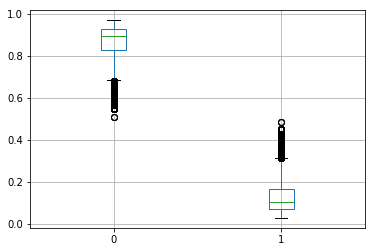

In [345]:
Gbrt_proba.boxplot()

In [383]:
Gbrt_proba[Gbrt_proba[1] > 0.33].count()

0    5536
1    5536
dtype: int64

In [483]:
Gbrt_proba046 = Gbrt_proba[1].map(lambda x = 1 : x >0.46)

Gbrt_proba046 = Gbrt_proba046.map({False: 0, True : 1})

Gbrt_proba046.sum()

3

In [ ]:
Knn_proba = knn.predict_proba(Test_Concat.iloc[:987709, :-1])
Rf_proba = rf.predict_proba(Test_Concat.iloc[:987709, :-1])
Tree_proba = tree.predict_proba(Test_Concat.iloc[:987709, :-1])

                   0              1
count  987709.000000  987709.000000
mean        0.874667       0.125333
std         0.174529       0.174529
min         0.000000       0.000000
25%         0.800000       0.000000
50%         1.000000       0.000000
75%         1.000000       0.200000
max         1.000000       1.000000


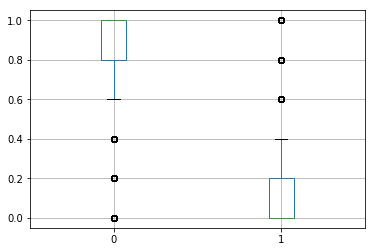

In [446]:
Knn_proba = pd.DataFrame(Knn_proba)

print(Knn_proba.describe())

Knn_proba.boxplot()

                   0              1
count  987709.000000  987709.000000
mean        0.874402       0.125598
std         0.110855       0.110855
min         0.000000       0.000000
25%         0.831595       0.047575
50%         0.906248       0.093752
75%         0.952425       0.168405
max         1.000000       1.000000


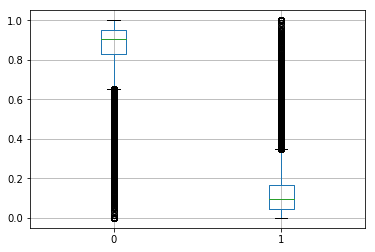

In [448]:
Rf_proba = pd.DataFrame(Rf_proba)

print(Rf_proba.describe())

Rf_proba.boxplot()

                   0              1
count  987709.000000  987709.000000
mean        0.874299       0.125701
std         0.111555       0.111555
min         0.000000       0.000000
25%         0.831579       0.047244
50%         0.907407       0.092593
75%         0.952756       0.168421
max         1.000000       1.000000


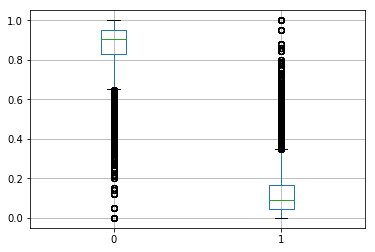

In [449]:
Tree_proba = pd.DataFrame(Tree_proba)

print(Tree_proba.describe())

Tree_proba.boxplot(

In [514]:
Knn_proba04 = Knn_proba[1].map(lambda x = 1 : x == 1)

Knn_proba04 = Knn_proba04.map({False: 0, True : 1})

Knn_proba04.sum()

1103

In [515]:
np.mean(Knn_proba04 == ggg['0.1'])

0.8735629623704958

In [513]:
Rf_proba05 = Rf_proba[1].map(lambda x = 1 : x > 0.99)

Rf_proba05 = Rf_proba05.map({False: 0, True : 1})

Rf_proba05.sum()

190

In [497]:
np.mean(Rf_proba05 == ggg['0.1'])

0.8742990091211076

In [510]:
Tree_proba9 = Tree_proba[1].map(lambda x = 1 : x ==1 )

Tree_proba9 = Tree_proba9.map({False: 0, True : 1})

Tree_proba9.sum()

868

In [511]:
np.mean(Tree_proba9 == ggg['0.1'])

0.874094495443496

In [526]:
Total_proba = Tree_proba9 + Rf_proba05 + Knn_proba04 + Gbrt_proba046

In [534]:
np.mean(Total_proba.map({0 : 0, 1 : 0, 2 : 1, 3 : 1}) == ggg['0.1'])

0.8743010340090047

In [ ]:
Knn_predict = knn.predict(Test_Concat.iloc[987709:, :-1])
Tree_predict = tree.predict(Test_Concat.iloc[987709:, :-1])
Gbrt_predict = gbrt.predict(Test_Concat.iloc[987709:, :-1])
RfP_predict = rfP.predict(Test_Concat.iloc[987709:, :-1])
Rf_predict = rf.predict(Test_Concat.iloc[987709:, :-1])

In [ ]:
Knn_probaR = knn.predict_proba(Test_Concat.iloc[987709:, :-1])
Rf_probaR = rf.predict_proba(Test_Concat.iloc[987709:, :-1])
Tree_probaR = tree.predict_proba(Test_Concat.iloc[987709:, :-1])
Gbrt_probaR = gbrt.predict_proba(Test_Concat.iloc[987709:, :-1])

In [ ]:
Tree_probaR = pd.DataFrame(Tree_probaR)
Rf_probaR = pd.DataFrame(Rf_probaR)
Knn_probaR = pd.DataFrame(Knn_probaR)

Gbrt_probaR = pd.DataFrame(Gbrt_probaR)

In [ ]:
Tree_probaRT = Tree_probaR[1].map(lambda x = 1 : x ==1 )

Tree_probaRT = Tree_probaRT.map({False: 0, True : 1})

Rf_probaRT = Rf_probaR[1].map(lambda x = 1 : x > 0.99)

Rf_probaRT = Rf_probaRT.map({False: 0, True : 1})

Knn_probaRT = Knn_probaR[1].map(lambda x = 1 : x == 1)

Knn_probaRT = Knn_probaRT.map({False: 0, True : 1})

Gbrt_probaRT = Gbrt_probaR[1].map(lambda x = 1 : x >0.46)

Gbrt_probaRT = Gbrt_probaRT.map({False: 0, True : 1})

Total_probaR = Tree_probaRT + Rf_probaRT + Knn_probaRT + Gbrt_probaRT

In [615]:
Total_probaRT = Total_probaR.map({0 : 0, 1 : 1.5, 2 : 1, 3 : 1, 4 : 1})

In [621]:
ToTal_probaRT = pd.DataFrame(Total_probaR)

In [628]:
Total_RT = ToTal_probaRT[1] + Total_predict[0]

In [632]:
Total_RT = pd.DataFrame(Total_RT)

In [639]:
Total_RT[0].value_counts()

0.0    15298
1.0      678
3.0       74
2.0       59
2.5       27
4.5       13
4.0        3
3.5        2
Name: 0, dtype: int64

In [642]:
Total_RT[1] = Total_RT.iloc[:, 1]

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [645]:
Total_RT[1].value_counts()

0.0     15298
20.0      678
60.0       74
40.0       59
50.0       27
90.0       13
80.0        3
70.0        2
Name: 1, dtype: int64

In [578]:
Total_predict = Knn_predict + Tree_predict + Gbrt_predict + RfP_predict + Rf_predict

In [589]:
Total_predict = pd.DataFrame(Total_predict)

In [608]:
Total_predict[Total_predict[0] == 3]

,0
468,3
478,3
481,3
482,3
483,3
484,3
504,3
539,3
629,3
909,3


In [ ]:
Total_predict.map({0 :0, 1:0 , 2 : 1, 3:1, 4: 1})

In [584]:
87 + 61 + 3

151

In [434]:
len(Gbrt_proba)

987709

In [233]:
fff.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [236]:
fff.drop('Unnamed: 0', axis=1, inplace = True)

In [237]:
ggg.drop('0', axis= 1, inplace = True)

In [249]:
fff.index

RangeIndex(start=0, stop=987709, step=1)

In [266]:
ggg.loc[987708, :] = 0

In [273]:
ggg.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            987699, 987700, 987701, 987702, 987703, 987704, 987705, 987706,
            987707, 987708],
           dtype='int64', length=987709)

In [272]:
fff.index

RangeIndex(start=0, stop=987709, step=1)

In [244]:
fff = fff.astype(int)

In [245]:
fff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987709 entries, 0 to 987708
Data columns (total 1 columns):
0    987709 non-null int32
dtypes: int32(1)
memory usage: 3.8 MB


In [278]:
fff.sort_index(inplace=True)

In [279]:
ggg.sort_index(inplace=True)

In [55]:
AFSNT_DLY

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,AOD,STT,DLY,DLY_RATE
0,2019,9,16,월,ARP1,ARP3,L,L1702,A,9:05,NaN,NaN
1,2019,9,16,월,ARP3,ARP1,L,L1702,D,7:55,NaN,NaN
2,2019,9,16,월,ARP1,ARP3,L,L1720,A,14:40,NaN,NaN
3,2019,9,16,월,ARP3,ARP1,L,L1720,D,13:30,NaN,NaN
4,2019,9,16,월,ARP4,ARP3,L,L1808,A,20:10,NaN,NaN
5,2019,9,16,월,ARP3,ARP4,L,L1808,D,19:10,NaN,NaN
6,2019,9,16,월,ARP3,ARP9,J,J1934,A,16:00,NaN,NaN
7,2019,9,16,월,ARP9,ARP3,J,J1934,D,15:00,NaN,NaN
8,2019,9,16,월,ARP3,ARP1,L,L1703,A,8:10,NaN,NaN
9,2019,9,16,월,ARP1,ARP3,L,L1703,D,7:00,NaN,NaN


In [658]:
Total_RT[0].value_counts()

0.0    15298
1.0      678
3.0       74
2.0       59
2.5       27
4.5       13
4.0        3
3.5        2
Name: 0, dtype: int64

In [665]:
Total_RT[1]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
16124     0.0
16125     0.0
16126     0.0
16127     0.0
16128     0.0
16129     0.0
16130     0.0
16131     0.0
16132     0.0
16133     0.0
16134     0.0
16135     0.0
16136     0.0
16137     0.0
16138     0.0
16139     0.0
16140     0.0
16141     0.0
16142     0.0
16143     0.0
16144     0.0
16145     0.0
16146     0.0
16147    20.0
16148     0.0
16149     0.0
16150     0.0
16151     0.0
16152     0.0
16153     0.0
Name: 1, Length: 16154, dtype: float64

In [650]:
Total_RT[0].map(lambda x = 1 : x > 0.5).sum()

119

In [651]:
Final_DLY = AFSNT_DLY.copy()

In [673]:
Final_DLY["DLY"] = Total_RT[0].map(lambda x = 1 : x > 0.5)

In [675]:
Final_DLY["DLY"] = Final_DLY["DLY"].map({False : 'N', True : 'Y'})

In [670]:
Final_DLY["DLY_RATE"] = Total_RT[1]

In [677]:
Total_RT[0].value_counts()

0.0    15298
1.0      678
3.0       74
2.0       59
2.5       27
4.5       13
4.0        3
3.5        2
Name: 0, dtype: int64

In [683]:
Final_DLY.to_csv("FinalDLY.csv", encoding='CP949')

In [688]:
b

985759